# Customer Behavior Analysis and Segmentation

**1. Importing Libraries and Loading Dataset**

In [34]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
file_name = 'C:\Excel Project\Customers.csv'
dataset = pd.read_csv(file_name)

**2. Exploring the Dataset**

In [37]:
dataset.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [38]:
dataset.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [39]:
dataset.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

**3. Handling Missing Values**

In [41]:
dataset.dropna(subset=['Profession'], inplace=True)

In [42]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

**4. Categorizing Income Groups**

In [44]:
def income_group(income):
    if income <= 5000:
        return 'Low Income'
    elif 5000 < income <= 50000:
        return 'Medium Income'
    else:
        return 'High Income'
dataset['income_group'] = dataset['Annual Income ($)'].apply(income_group)

print (dataset[['Annual Income ($)', 'income_group']].head())

   Annual Income ($)   income_group
0              15000  Medium Income
1              35000  Medium Income
2              86000    High Income
3              59000    High Income
4              38000  Medium Income


In [45]:
print(dataset.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size   income_group  
0     Healthcare                1            4  Medium Income  
1       Engineer                3            3  Medium Income  
2       Engineer                1            1    High Income  
3         Lawyer                0            2    High Income  
4  Entertainment                2            6  Medium Income  


**Drop Duplicate Column**

In [47]:
dataset.drop('income_group',axis=1, inplace=True)

In [48]:
print(dataset.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


**5. Categorizing Age Groups**

In [50]:
def age_group(age):
    if age <= 25:
        return 'Young Adult'
    elif 26 <= age <= 35:
        return 'Adult'
    elif 36 <= age <= 50:
        return 'Middle-aged'
    else: 
        return 'Senior'
dataset['age_group']= dataset['Age'].apply(age_group)

In [51]:
print(dataset.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size    age_group  
0     Healthcare                1            4  Young Adult  
1       Engineer                3            3  Young Adult  
2       Engineer                1            1  Young Adult  
3         Lawyer                0            2  Young Adult  
4  Entertainment                2            6        Adult  


**6. Categorizing Spending Behavior**

In [53]:
def spending_behavior(score):
    if score <= 33:
        return 'Low Spender'
    elif 34 <= score <=66:
        return 'Medium Spender'
    else:
        return 'High Spender'

dataset['spending_behavior'] = dataset['Spending Score (1-100)'].apply(spending_behavior)

In [54]:
print(dataset.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size    age_group spending_behavior  
0     Healthcare                1            4  Young Adult    Medium Spender  
1       Engineer                3            3  Young Adult      High Spender  
2       Engineer                1            1  Young Adult       Low Spender  
3         Lawyer                0            2  Young Adult      High Spender  
4  Entertainment                2            6        Adult    Medium Spender  


**7. Categorizing Family Size**

In [56]:
def family_size_group(size):
    if size <= 3:
        return 'Small Family'
    elif 4 <= size <= 6:
        return 'Medium Family'
    else:
        return 'Large Family'

dataset['family_size_group'] = dataset['Family Size'].apply(family_size_group)

In [57]:
print(dataset.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size    age_group spending_behavior  \
0     Healthcare                1            4  Young Adult    Medium Spender   
1       Engineer                3            3  Young Adult      High Spender   
2       Engineer                1            1  Young Adult       Low Spender   
3         Lawyer                0            2  Young Adult      High Spender   
4  Entertainment                2            6        Adult    Medium Spender   

  family_size_group  
0     Medium Family  
1      Small Family  
2      S

**8. Categorizing Work Experience**

In [59]:
def work_experience_group(Experience):
    if Experience <1:
        return 'Less than 1 year'
    elif 1 <= Experience <= 5:
        return '1-5 years'
    elif 6 <= Experience <= 10:
        return '6-10 years'
    else:
        return 'More than 10 years'

dataset['work_experience_group'] = dataset['Work Experience'].apply(work_experience_group)

In [165]:
print(dataset.head())

   Gender  Age  Annual Income ($)  Spending Score (1-100)     Profession  \
0    Male   19              15000                      39     Healthcare   
1    Male   21              35000                      81       Engineer   
2  Female   20              86000                       6       Engineer   
3  Female   23              59000                      77         Lawyer   
4  Female   31              38000                      40  Entertainment   

   Work Experience  Family Size    age_group spending_behavior  \
0                1            4  Young Adult    Medium Spender   
1                3            3  Young Adult      High Spender   
2                1            1  Young Adult       Low Spender   
3                0            2  Young Adult      High Spender   
4                2            6        Adult    Medium Spender   

  family_size_group work_experience_group  Cluster  
0     Medium Family             1-5 years        2  
1      Small Family             1-5 year

In [167]:
dataset.isnull().sum()

Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
age_group                 0
spending_behavior         0
family_size_group         0
work_experience_group     0
Cluster                   0
dtype: int64

**9. Handling Duplicates and Data Cleaning**

In [63]:
dataset.duplicated().sum()
dataset = dataset.drop_duplicates()

In [64]:
dataset['Gender'] = dataset['Gender'].str.lower()
dataset['Gender'] = dataset['Gender'].map({'male': 'Male','female': 'Female'})

In [65]:
print(dataset.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size    age_group spending_behavior  \
0     Healthcare                1            4  Young Adult    Medium Spender   
1       Engineer                3            3  Young Adult      High Spender   
2       Engineer                1            1  Young Adult       Low Spender   
3         Lawyer                0            2  Young Adult      High Spender   
4  Entertainment                2            6        Adult    Medium Spender   

  family_size_group work_experience_group  
0     Medium Family           

**10. Outlier Removal**

In [67]:
import numpy as np
from scipy import stats
dataset = dataset[(np.abs(stats.zscore(dataset['Annual Income ($)'])) <3)]

In [68]:
dataset['Age'] = pd.to_numeric(dataset['Age'], errors='coerce')
dataset['Gender'] = dataset['Gender'].astype('category')

In [69]:
dataset = dataset.drop(columns=['CustomerID'])

In [70]:
print(dataset.head())

   Gender  Age  Annual Income ($)  Spending Score (1-100)     Profession  \
0    Male   19              15000                      39     Healthcare   
1    Male   21              35000                      81       Engineer   
2  Female   20              86000                       6       Engineer   
3  Female   23              59000                      77         Lawyer   
4  Female   31              38000                      40  Entertainment   

   Work Experience  Family Size    age_group spending_behavior  \
0                1            4  Young Adult    Medium Spender   
1                3            3  Young Adult      High Spender   
2                1            1  Young Adult       Low Spender   
3                0            2  Young Adult      High Spender   
4                2            6        Adult    Medium Spender   

  family_size_group work_experience_group  
0     Medium Family             1-5 years  
1      Small Family             1-5 years  
2      Small F

**11. Summary Statistics**

In [72]:
mean_income = dataset['Annual Income ($)'].mean()
print(f"Mean Annual Income: {mean_income}")

Mean Annual Income: 110616.0096692112


In [73]:
median_income = dataset['Annual Income ($)'].median()
print(f"Median Annual Income: {median_income}")

Median Annual Income: 109759.0


In [74]:
print(dataset.head())

   Gender  Age  Annual Income ($)  Spending Score (1-100)     Profession  \
0    Male   19              15000                      39     Healthcare   
1    Male   21              35000                      81       Engineer   
2  Female   20              86000                       6       Engineer   
3  Female   23              59000                      77         Lawyer   
4  Female   31              38000                      40  Entertainment   

   Work Experience  Family Size    age_group spending_behavior  \
0                1            4  Young Adult    Medium Spender   
1                3            3  Young Adult      High Spender   
2                1            1  Young Adult       Low Spender   
3                0            2  Young Adult      High Spender   
4                2            6        Adult    Medium Spender   

  family_size_group work_experience_group  
0     Medium Family             1-5 years  
1      Small Family             1-5 years  
2      Small F

**12. Data Visualization Distribution Plots**

In [76]:
pd.set_option('display.max_columns', None)
print(dataset.head())

   Gender  Age  Annual Income ($)  Spending Score (1-100)     Profession  \
0    Male   19              15000                      39     Healthcare   
1    Male   21              35000                      81       Engineer   
2  Female   20              86000                       6       Engineer   
3  Female   23              59000                      77         Lawyer   
4  Female   31              38000                      40  Entertainment   

   Work Experience  Family Size    age_group spending_behavior  \
0                1            4  Young Adult    Medium Spender   
1                3            3  Young Adult      High Spender   
2                1            1  Young Adult       Low Spender   
3                0            2  Young Adult      High Spender   
4                2            6        Adult    Medium Spender   

  family_size_group work_experience_group  
0     Medium Family             1-5 years  
1      Small Family             1-5 years  
2      Small F

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
pd.set_option('display.max_columns', None)

In [79]:
print(dataset.head())

   Gender  Age  Annual Income ($)  Spending Score (1-100)     Profession  \
0    Male   19              15000                      39     Healthcare   
1    Male   21              35000                      81       Engineer   
2  Female   20              86000                       6       Engineer   
3  Female   23              59000                      77         Lawyer   
4  Female   31              38000                      40  Entertainment   

   Work Experience  Family Size    age_group spending_behavior  \
0                1            4  Young Adult    Medium Spender   
1                3            3  Young Adult      High Spender   
2                1            1  Young Adult       Low Spender   
3                0            2  Young Adult      High Spender   
4                2            6        Adult    Medium Spender   

  family_size_group work_experience_group  
0     Medium Family             1-5 years  
1      Small Family             1-5 years  
2      Small F

## Step 1: Importing Required Libraries

In [81]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)



## 1. What is the Gender Distribution of Customers?

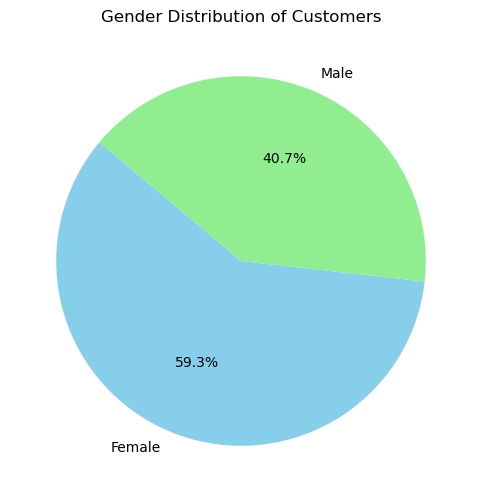

In [83]:
# Gender Distribution
plt.figure(figsize=(8, 6))
gender_counts = dataset['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Gender Distribution of Customers')
plt.show()

## 2. What is the Spending Behavior Across Age Groups?

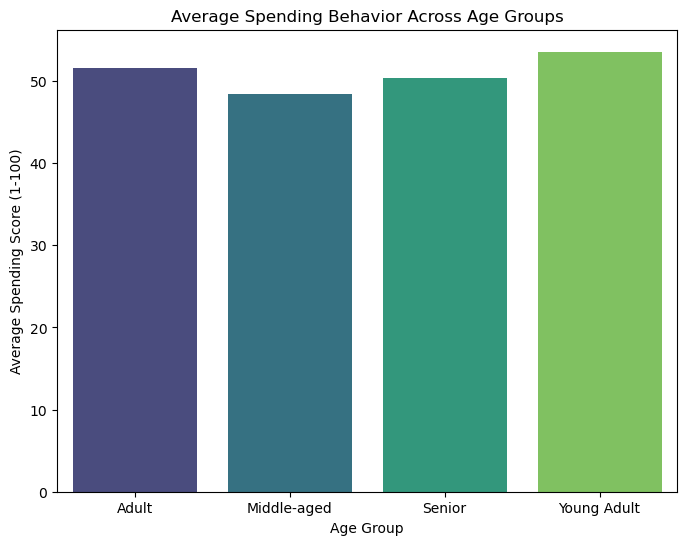

In [85]:
# Spending Behavior by Age Groups
plt.figure(figsize=(8, 6))
mean_spending_by_age = dataset.groupby('age_group')['Spending Score (1-100)'].mean()
sns.barplot(x=mean_spending_by_age.index, y=mean_spending_by_age.values, palette='viridis')
plt.title('Average Spending Behavior Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Spending Score (1-100)')
plt.show()

## 3. What is the Income Distribution Across Age Groups?

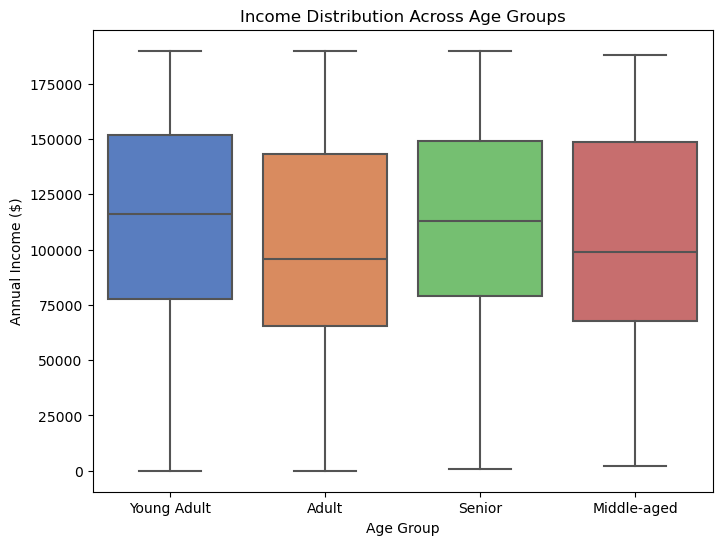

In [87]:
# Income Distribution by Age Groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='age_group', y='Annual Income ($)', data=dataset, palette='muted')
plt.title('Income Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Annual Income ($)')
plt.show()

## 4. What is the Spending Behavior Across Family Size Groups?

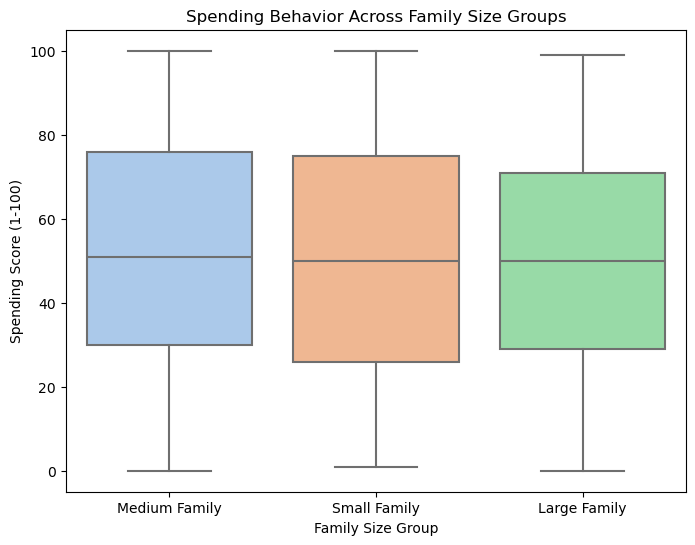

In [89]:
# Spending Behavior Across Family Sizes
plt.figure(figsize=(8, 6))
sns.boxplot(x='family_size_group', y='Spending Score (1-100)', data=dataset, palette='pastel')
plt.title('Spending Behavior Across Family Size Groups')
plt.xlabel('Family Size Group')
plt.ylabel('Spending Score (1-100)')
plt.show()

## 5. Which Profession Spends the Most?

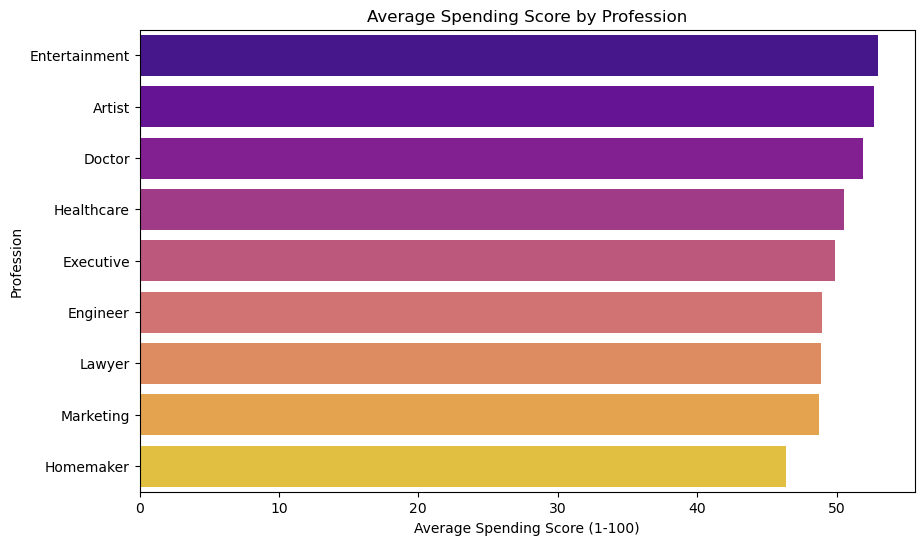

In [91]:
# Average Spending by Profession
plt.figure(figsize=(10, 6))
mean_spending_by_profession = dataset.groupby('Profession')['Spending Score (1-100)'].mean().sort_values(ascending=False)
sns.barplot(x=mean_spending_by_profession.values, y=mean_spending_by_profession.index, palette='plasma')
plt.title('Average Spending Score by Profession')
plt.xlabel('Average Spending Score (1-100)')
plt.ylabel('Profession')
plt.show()

## 6. Which Cluster (Segment) has the Highest Average Spending Score?

**A] Check if Clustering Was Performed**

In [94]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant columns for clustering
X = dataset[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Family Size']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\ravin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [95]:
print(dataset.head())

   Gender  Age  Annual Income ($)  Spending Score (1-100)     Profession  \
0    Male   19              15000                      39     Healthcare   
1    Male   21              35000                      81       Engineer   
2  Female   20              86000                       6       Engineer   
3  Female   23              59000                      77         Lawyer   
4  Female   31              38000                      40  Entertainment   

   Work Experience  Family Size    age_group spending_behavior  \
0                1            4  Young Adult    Medium Spender   
1                3            3  Young Adult      High Spender   
2                1            1  Young Adult       Low Spender   
3                0            2  Young Adult      High Spender   
4                2            6        Adult    Medium Spender   

  family_size_group work_experience_group  Cluster  
0     Medium Family             1-5 years        2  
1      Small Family             1-5 year

**B] Ensure Column Naming Matches**

In [97]:
dataset.rename(columns={'YourClusterColumnName': 'Cluster'}, inplace=True)

**C] Re-run the Plot Code**

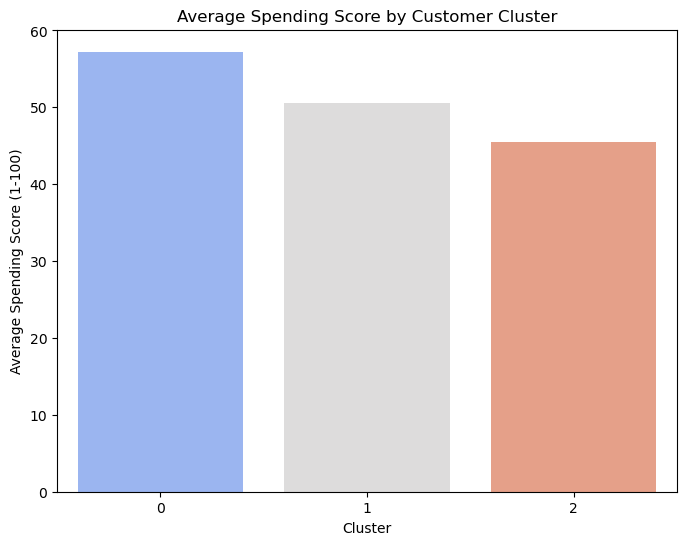

In [99]:
plt.figure(figsize=(8, 6))
cluster_spending = dataset.groupby('Cluster')['Spending Score (1-100)'].mean()
sns.barplot(x=cluster_spending.index, y=cluster_spending.values, palette='coolwarm')
plt.title('Average Spending Score by Customer Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending Score (1-100)')
plt.show()

**D] Verify Data Consistency**

In [101]:
print(dataset.columns)

Index(['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)',
       'Profession', 'Work Experience', 'Family Size', 'age_group',
       'spending_behavior', 'family_size_group', 'work_experience_group',
       'Cluster'],
      dtype='object')


## 7. Is there a Relationship Between Income and Spending Score?

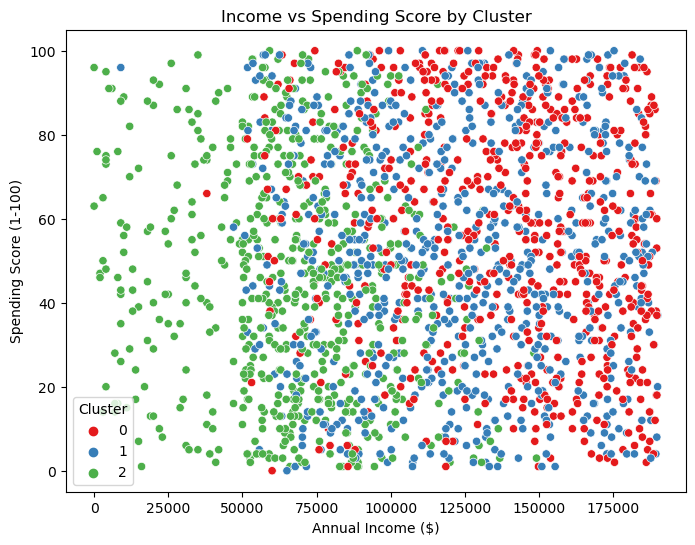

In [103]:
# Income vs Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', hue='Cluster', data=dataset, palette='Set1')
plt.title('Income vs Spending Score by Cluster')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## 8. What is the Distribution of Customers Across Clusters?

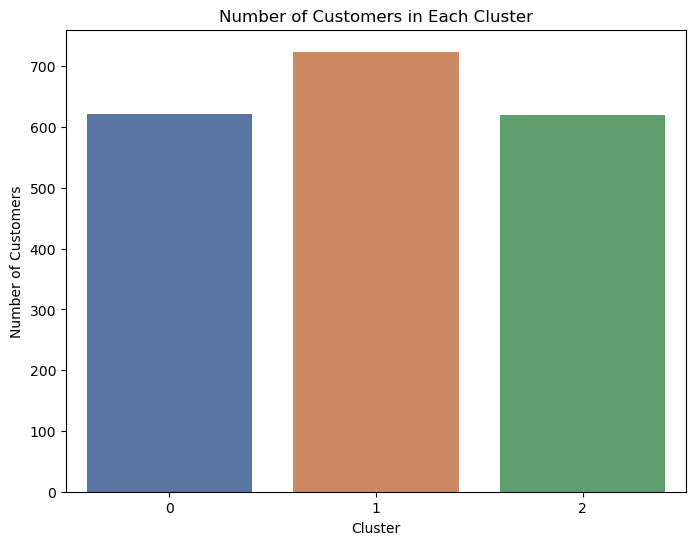

In [105]:
# Cluster Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=dataset, palette='deep')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

## 9. What is the Income and Spending Behavior for Each Cluster?

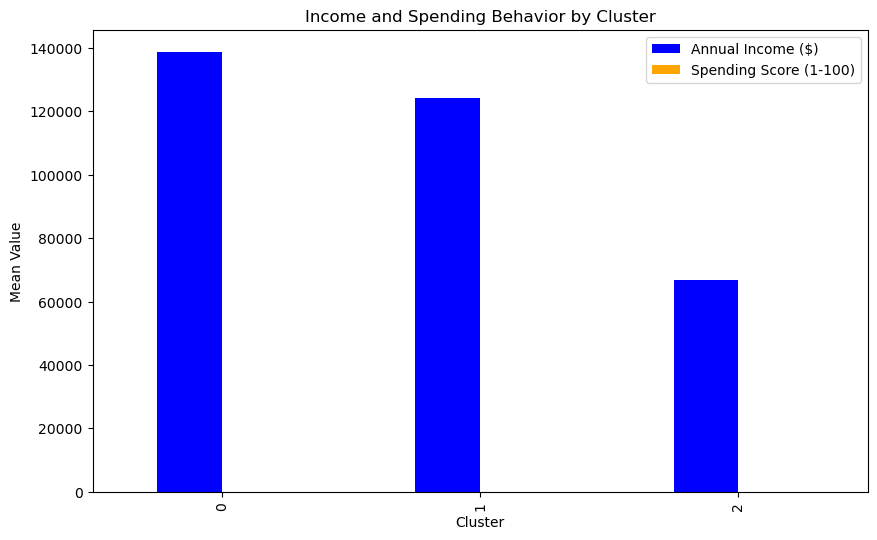

In [107]:
# Income and Spending Behavior by Cluster
cluster_summary = dataset.groupby('Cluster')[['Annual Income ($)', 'Spending Score (1-100)']].mean()

# Plot
cluster_summary.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Income and Spending Behavior by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(['Annual Income ($)', 'Spending Score (1-100)'])
plt.show()

## 10. What is the Distribution of Work Experience Across Clusters?

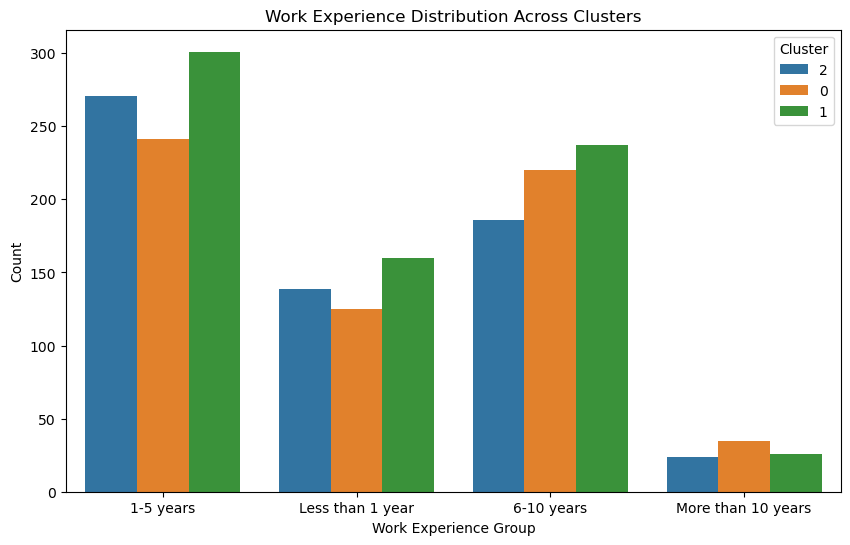

In [109]:
# Convert 'Cluster' to string to avoid legend issues
dataset['Cluster'] = dataset['Cluster'].astype(str)

# Plot the distribution of work experience by cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='work_experience_group', hue='Cluster', data=dataset, palette='tab10')
plt.title('Work Experience Distribution Across Clusters')
plt.xlabel('Work Experience Group')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()

**Performing K-Means Clustering and Data Normalization**

In [111]:
# Perform K-Means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming dataset is already preprocessed and ready
X = dataset[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Family Size']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\ravin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Analyzing Cluster Insights by Calculating Average Values for Key Features**

In [113]:
# Calculate average values for key features by cluster
cluster_insights = dataset.groupby('Cluster')[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Family Size']].mean()
print(cluster_insights)

# Add insights for each cluster
for cluster in range(len(cluster_insights)):
    print(f"\nCluster {cluster} Insights:")
    print(f"- Average Age: {cluster_insights.loc[cluster, 'Age']:.1f}")
    print(f"- Average Annual Income: ${cluster_insights.loc[cluster, 'Annual Income ($)']:.2f}")
    print(f"- Average Spending Score: {cluster_insights.loc[cluster, 'Spending Score (1-100)']:.1f}")
    print(f"- Average Family Size: {cluster_insights.loc[cluster, 'Family Size']:.1f}")

               Age  Annual Income ($)  Spending Score (1-100)  Family Size
Cluster                                                                   
0        24.481481      138707.597424               57.233494     4.528180
1        77.845304      124092.098066               50.592541     4.096685
2        39.540323       66742.519355               45.482258     2.588710

Cluster 0 Insights:
- Average Age: 24.5
- Average Annual Income: $138707.60
- Average Spending Score: 57.2
- Average Family Size: 4.5

Cluster 1 Insights:
- Average Age: 77.8
- Average Annual Income: $124092.10
- Average Spending Score: 50.6
- Average Family Size: 4.1

Cluster 2 Insights:
- Average Age: 39.5
- Average Annual Income: $66742.52
- Average Spending Score: 45.5
- Average Family Size: 2.6
